In [1]:
import numpy as np

# Einführung

Das Modul [**Numpy**](https://numpy.org/doc/stable/index.html) bildet, so kann man sagen, die Grundlage des gesamten *Python Science Stack*. NumPy ist eine *numerische* Programmbibliothek für das Rechnen mit Vektoren und Matrizen. Darüber hinaus bietet NumPy effektive Array Datenstrukturen, sowie Funktionen für numerische Berechnungen.

Auch wenn Sie im täglichen Umgang mit NumPy eher weniger direkt in Berührung kommen, sondern mehr mit Pandas arbeiten werden (siehe Kapitel 4), so nutzt doch letzteres "unter der Haube" jenes NumPy. Mit NumPy ist es sehr leicht Rechenoperationen auf ganze Daten-Arrays anzuwenden, ohne *for-Schleifen* zu benutzen. Es lohnt sich also - in Vorbereitung auf den Umgang mit Pandas ein Grundverständnis von NumPy zu erwerben. Wenn Sie natürlich in ihrer wissenschaftlichen Praxis stärker auf numerische Berechnungen oder lineare Algebra setzen, dann sollten sie sich NumPy noch genauer ansehen.

NumPy ist die Grundlage des kompletten Python Science Stacks:

![Numpy Lifting](./img/numpy_lifting.png)

Sie finden alle Informationen zu NumPy und die aktuelle Dokumentation, die ich Ihnen zum Selbststudium nur wärmstens ans Herz legen kann auf der offiziellen Internetpräsenz [numpy.org](https://numpy.org/). Ihr Einstiegspunkt für viele Fragen stellt die [API Referenz](https://numpy.org/doc/stable/reference/index.html) dar, die aber am Anfang auch sehr abschreckend wirken kann. Versuchen Sie sich in einer ruhigen Minute einen Überblick zu verschaffen, indem Sie das Inhaltsverzeichnis ein bisschen "durchklicken".

**Hilfe** bekommen Sie aber auch über die `help` Funktion von IPython. Möchten Sie beispielsweise mehr über das Random Modul von NumPy wissen, so geben Sie `help(np.random)` ein.

In [3]:
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation
    
    Use ``default_rng()`` to create a `Generator` and call its methods.
    
    =============== =========================================================
    Generator
    --------------- ---------------------------------------------------------
    Generator       Class implementing all of the random number distributions
    default_rng     Default constructor for ``Generator``
    =============== =========================================================
    
    ============================================= ===
    BitGenerator Streams that work with Generator
    --------------------------------------------- ---
    MT19937
    PCG64
    PCG64DXSM
    Philox
    SFC64
    ============================================= ===
    
    ============================================= ===
    Getting entropy to initialize a BitGenerator
    --------------------------------------------

## Warum NumPy?

Es gibt vor allem zwei Gründe für die Entwicklung von NumPy, die übrigens schon im Jahre 1995 unter dem Acronym *Numeric* begann: einerseits eine effiziente Datenstruktur mit hoher Zugriffszeit, sowie die Möglichkeit des Rechnens mit diesen Datenstrukturen.

Werfen wir zuerst einen Blick auf das Thema Geschwindigkeit. Schreiben wir ein kleine Funktion, die einfach die ganzen Zahlen von 1 bis n summiert.

In [7]:
def sum_integers(n: int) -> int:
    s = 0
    i = 1
    while i < n:
        s += i
        i += 1
    return s

%timeit sum_integers(1_000_000)

69.5 ms ± 359 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Anstatt einer "teuren" while-Schleife sollten wir vielleicht besser integrierte Python Funktionen wie die `sum()` Funktion oder *List-Comprehensions* verwenden, da diese auf angepassten C-Code basieren?

In [8]:
def sum_integers_py(n: int) -> int:
    return sum(range(n))

%timeit sum_integers_py(1_000_000)

14.5 ms ± 522 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Das sieht schon besser aus. Probieren wir das ganze noch mit NumPy aus.

In [9]:
def sum_integers_numpy(n: int) -> int:
    return np.array(np.arange(n), dtype=np.int32).sum()

%timeit sum_integers_numpy(1_000_000)

1.94 ms ± 85.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Wir sehen, dass NumPy die Ausführung von Code erheblich verbessern kann. Bei komplexeren Algorithmen und Berechnung kann NumPy die Ausführung sogar um den Faktor 100 verbessern.

Ein weiterer Punkt ist die einfache Anwendung von Rechenoperationen auf ganze Arrays, auch mehrdimensionale. Stellen wir uns eine zwei Vektoren mit Ganzzahlen vor, deren Elemente wir in Python paarweise addieren wollen. In reinem Python müsste man etwas wie folgt schreiben (ausserdem messen wir mal wieder die Zeit:

In [4]:
from typing import List
import random

def add_vectors(v1: List[int], v2: List[int]) -> List[int]:

    assert len(v1) == len(v2), "Beide Vektoren müssen gleich lang sein!"
    output = [v1[i] + v2[i] for i, _ in enumerate(v1)]

    return output

vec1 = [random.choices(range(1, 10), k=1_000_000)]
vec2 = [random.choices(range(1, 10), k=1_000_000)]

%timeit add_vectors(vec1, vec2)

4.52 ms ± 175 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Mit NumPy ist der Code wesentlich simpler und auch schneller.

In [11]:
def add_vectors_np(np_arr1, np_arr2):
    return np_arr1 + np_arr2 # das ist alles!!

np_vec1 = np.random.randint(low=1, high=9, size=1_000_000)
np_vec2 = np.random.randint(low=1, high=9, size=1_000_000)

%timeit add_vectors_np(np_vec1, np_vec2)

1.24 ms ± 5.11 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Im Prinzip brauchen wir also nur den "+" Operator (Zeile 4), um zwei Vektoren elementweise zu addieren. Das geht, wie wir später noch sehen werden auch mit mehrdimensionalen Matrizen.

## NumPy Arrays: ndarray

Damit dies funktioniert, arbeitet NumPy mit sog. Arrays, Datenstrukturen, auf deren Elemente sehr schnell im Speicher zugegriffen werden kann. In Numpy heiẞen diese Array-Objekte **ndarrays** (N-dimensionale Arrays). Die NumPy Arrays unterscheiden sich von klassischen sequentiellen Datenstrukturen in Python wie Listen und Tupel in folgenden Punkten:
  - Bei ihrer Generierung haben *ndarrays* eine fest gesetzte Gröẞe, anders als Listen, die dynamisch wachsen können. Wir der Arrays verändert, wird ein neues Array erstellt und der alte im Speicher gelöscht.
  - Alle Elemente eines Arrays müssen den gleichen Datentyp haben und damit auch die gleiche Gröẞe im Speicher. Einzige Ausnahme: jedes Python Objekt kann auch Teil eines *ndarrays* sein.
  - Es sind, wie schon gezeigt, mathematische Funktionen für diese Arrays vorhanden, mit denen man diesen Objekten sehr effizient operieren kann, ohne viel Code zu schreiben.

Wie wird nun ein *ndarray* erzeugt? Hierfür gibt es die Funktion `np.array()`, dem wir eine ganze normale Python Liste samt Elementen übergeben.

In [5]:
obj = np.array([2, 3, 5])
liste = [2, 3, 5]
print(liste)
print(obj)
print(obj.dtype)

[2, 3, 5]
[2 3 5]
int64


### Verschiedene Dimensionen

Auch mehrdimensionale Matrizen kann man so erzeugen. Dabei gibt dann die Methode `.shape` ein Tupel mit der Gröẞe der Dimensionen zurück.

In [3]:
obj1 = np.array([1, 2, 3, 4])

print(obj1.shape)

obj2 = np.array([[1, 2, 3 , 4], [4, 3, 2, 1]])

print(obj2.shape)

(4,)
(2, 4)


Den obigen Numpy Array `obj1` nennt man auch einen *Vektor*, da dieser nur *eine* Dimension hat. `obj2` nennt man eine *Matrix* (Pl. *Matrizen*), da es min. zwei Dimensionen hat.

Natürlich kann man dieses Dimensionen-Spielchen theoretisch unendlich weiterführen. Einen Array mit drei oder mehr Dimensionen nennt man *Tensor*.


Man erzeugt einen Tesor indem man einen `ndarray` aus einer Liste von zweidimensionalen Listen erzeugt. Einen dreidimensionalen Tensor kann man sich dabei wie einen Rubic's Cube vorstellen:

![Rubics Cube](./img/rubics_cube.png)


In [5]:
# Bau eines Tensors:

matrix1 = np.array([[1, 3, 4, 6], [3, 4, 6, 8]])
matrix2 = np.array([[3, 2, 4, 5], [7, 6, 8, 9]])
matrix3 = np.array([[0, 1, 9, 2], [2, 3, 4, 5]])

tensor = np.array([ matrix1, matrix2, matrix3 ])

print(tensor, "\n")

print(tensor.shape)

[[[1 3 4 6]
  [3 4 6 8]]

 [[3 2 4 5]
  [7 6 8 9]]

 [[0 1 9 2]
  [2 3 4 5]]] 

(3, 2, 4)


Mehr als drei Dimensionen mental zu visualisieren ist nicht leicht. Eine Analogie aus dem täglichen Leben mag aber helfen:

- **2d:** Zeilen und Spalten
- **3d:** Rubic's Cube
- **4d:** eine Schublade voll Rubic's Cubes
- **5d:** ein Schreibtisch mit mehreren Schubladen voll Rubic's Cubes
- **6d:** eine Halle voller Schreibtische voller ...
- **7d:** eine Strasse mit aneinandergereihten Hallen voll Schreibtischen voller ...
- **8d:** usw. usw.

## Vektoren und Matrizen direkt erzeugen lassen

Es gibt viele Methoden zur Erzeugung von Numpy Arrays. Einen Überblick über alle finden Sie [hier](https://numpy.org/doc/stable/reference/routines.array-creation.html).

Die wichtigsten folgen als Beispiel.

### np.zeros | np.ones | np.full

In [9]:
zeros = np.zeros((5, 5), dtype="int32")

print(zeros)

print(zeros.dtype)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
int32


In [4]:
ones = np.ones((4, 8))

ones

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

In [6]:
all_as = np.full((5, 5), 'a')

all_as

array([['a', 'a', 'a', 'a', 'a'],
       ['a', 'a', 'a', 'a', 'a'],
       ['a', 'a', 'a', 'a', 'a'],
       ['a', 'a', 'a', 'a', 'a'],
       ['a', 'a', 'a', 'a', 'a']], dtype='<U1')

### np.linspace

Die Methode `np.linspace` teilt eine Zahlenreihe in *n* gleichgroße Teile. Dabei können nicht nur *Integer* sondern auch *Floatingpoint* Zahlen für die Spannweite angegeben werden. N muss allerdings eine Ganzzahl bleiben.

In [20]:
ten_spaces = np.linspace(0, 1, 10)

ten_spaces

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [23]:
ten_spaces_dec = np.linspace(0.2, 0.8, 10)
ten_spaces_dec

array([0.2       , 0.26666667, 0.33333333, 0.4       , 0.46666667,
       0.53333333, 0.6       , 0.66666667, 0.73333333, 0.8       ])

`linspace` bildet dabei standardmäßig ein geschlossenes Intervall. Möchte man dagegen ein halboffenes Intervall bilden, so muss man den Parameter `endpoint` auf `False` setzen.

In [9]:
ten_spaces_wo_one = np.linspace(0, 1, 10, endpoint=False)

ten_spaces_wo_one

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

Mit dem Parameter `retstept` kann man sich überdies die *Schrittlänge*, die durch `linspace` produziert wird ausgeben lassen.

In [16]:
retstep = np.linspace(0, 1, 8, retstep=True)

print(retstep)
print(f"Größe der Schritte: {retstep[1]}")

(array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        ]), 0.14285714285714285)
Größe der Schritte: 0.14285714285714285


### np.arange

Mit `np.arange` kann man eine Zahlenreihe als Array generieren, ähnlich, wie die Python Basis Funktion `range()`. Auch die Syntax ist mit dieser vergleichbar (nur setzt man die Parameter mit Kommas "," statt mit Doppelpunkten ":" ab):

```
np.arange( start, stop, step )
```

Auch hier bilder "start" und "stop" ein *halboffenes Intervall*.

In [24]:
arrrange = np.arange(1, 14, 2)

print(arrrange)

arrrange = np.arange(0.5, 6.1, 0.8)

print(arrrange)

[ 1  3  5  7  9 11 13]
[0.5 1.3 2.1 2.9 3.7 4.5 5.3]


### Reshaping: Dimensionalität eines Arrays ändern

Über das Attribut `.shape` kann man die Dimensionen eines Arrays auslesen und über den Zuweisungsoperator auch ändern.

Möchte man die Dimensionen eines Arrays gleich beim Erstellen (z.b. über `arange` oder `linspace`) desselbigen ändern, so kann man die Methode `.reshape()` benutzen.

Beachten Sie dabei, dass `(m, n, k) = m * n * k` die Anzahl an Elementen im Array sein muss.

In [104]:
arr = np.arange(48)

arr.shape = (4, 12)

arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [105]:
arr2 = np.arange(48).reshape((4, 12))

arr2

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

### np.random

Das *Random* Modul von NumPy ist ein mächtiges Werkzeug zum Erzeugen von Zufallszahlen. Dabei kann auch aus verschiedensten Wahrscheinlichkeitsverteilungen gewählt werden.

Seit NumPy Version 1.17 (aus dem Jahr 2019) hat sich hier allerdings die Erzeugung von Zufallszahlen geändert. Wir wollen hier gleich den neuen Standard übernehmen. Für Ihr Verständnis, falls Sie älteren Code lesen müssen, sei darauf verwiesen, dass die alten Aufrufe `np.random.randint` und `np.random.randn` als sog. *Legacy Code* erhalten bleibt. Sie sollten aber die neue Funktion `np.random.default_rng` (rng = "random number generator"), die einen *PCG64 Zahlen Generator* erzeugt, benutzen.

Grundsätzlich funktioniert die Erzeugung von Zufallszahlen in NumPy nun in zwei Schritten:
1. Zuerst wird über einen *BitGenerator* eine Zahlenfolge erstellte, die
2. dann über einen *Generator* in eine *Wahrscheilichkeitsverteilung* überführt wird.

Übergeben Sie an den `default_rng` Parameter `seed` eine beliebige Zahl, können Sie dadurch die immer gleichen Zahlenfolgen generieren. Dies ist unter anderem zu Simulationzwecken und in "reproduzierbarer wissenschaftlicher Forschung" notwendig.

Die Methode `.random()` generiert Zufallszahlen zwischen 0 und 1. Als Argument übergibt man die Anzahl der Zahlen, bzw. den *shape* des Arrays, der ausgegeben werden soll.

In [36]:
from numpy.random import default_rng

rng = default_rng(seed=42)

rand_nums = rng.random((2, 10))

rand_nums

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803, 0.09417735,
        0.97562235, 0.7611397 , 0.78606431, 0.12811363, 0.45038594],
       [0.37079802, 0.92676499, 0.64386512, 0.82276161, 0.4434142 ,
        0.22723872, 0.55458479, 0.06381726, 0.82763117, 0.6316644 ]])

Über die Methode `.integers()` lassen sich beliebige Ganzzahlen generieren. Als Parameter kann man die Range, die Anzahl, den Typ, sowie den Endpoint angeben. Letzterer bestimmt ob die Range ein geschlossenes oder halboffenes Inervall ist (siehe `np.arange`).

In [38]:
rand_ints = rng.integers(0, 10, 12, endpoint=False)

rand_ints

array([3, 4, 4, 0, 5, 1, 7, 6, 9, 7, 3, 9])

Die Methode `.choice()` ermöglicht es, Samples (Stichproben) aus einer Liste an Elemente zu ziehen. Über den Parameter `p` kann eine Liste an Wahrscheinlichkeiten übergeben werden. **Beachten Sie dabei,** dass die Anzahl der Wahrscheinlichkeiten gleich der Anzahl der Elemente, aus denen gewählt wird, sein muss. Ausserdem muss die Summe der Wahrscheinlichkeiten 1 ergeben.

In [41]:
import string

letters = [c for c in string.ascii_lowercase]

sample_chars = rng.choice(letters, size=12, replace=True)

sample_chars

array(['i', 'f', 'o', 'r', 'y', 'l', 'e', 'v', 'q', 's', 'c', 'i'],
      dtype='<U1')

In [54]:
numbers = list(range(10))

probabilities = [(0.6 / 8)] * 8 + [0.2, 0.2] # wir geben der 8 und der 9 etwas höhere Chancen

sample_nums = rng.choice(numbers, size=333, replace=True, p=probabilities)

print(sample_nums)

# anschließend zählen wir die Zahlen

_, counts = np.unique(sample_nums, return_counts=True)

num_counts = dict(zip(numbers, counts))

print(num_counts)

[9 1 9 1 2 7 0 0 0 5 8 0 8 9 2 1 9 9 7 9 1 5 8 3 8 6 8 6 4 2 2 8 1 1 2 2 9
 5 9 1 8 5 5 9 9 9 2 2 8 3 8 7 7 9 8 0 0 8 6 3 5 8 9 7 5 3 6 4 7 8 0 0 2 9
 8 2 9 6 6 9 0 2 7 2 8 2 1 2 5 2 1 9 4 4 0 4 3 8 2 9 9 1 1 1 8 1 9 8 9 7 9
 0 5 4 9 7 9 2 9 6 6 9 5 5 7 1 4 2 1 9 7 4 5 5 8 9 9 5 4 6 7 6 8 7 4 4 5 1
 2 8 5 2 7 8 3 9 9 7 8 0 9 5 9 7 0 0 8 7 0 8 9 6 6 0 8 4 9 4 7 3 2 8 6 7 9
 9 9 2 7 9 4 1 9 6 7 9 8 5 4 5 1 8 9 3 4 9 0 6 6 8 2 8 5 8 0 6 6 2 1 2 4 1
 9 5 9 9 1 8 9 8 5 5 0 7 9 9 0 8 4 9 0 9 9 1 0 9 2 7 9 7 5 5 0 9 4 2 3 9 1
 9 8 9 9 9 9 1 8 7 7 9 9 8 6 6 5 4 5 1 1 8 5 9 8 0 2 2 9 2 6 9 9 3 0 2 0 2
 7 9 7 8 2 9 8 9 9 4 1 3 5 9 5 8 7 2 4 8 8 5 3 8 2 9 2 1 6 6 6 5 9 6 6 5 0]
{0: 27, 1: 28, 2: 36, 3: 12, 4: 22, 5: 33, 6: 26, 7: 29, 8: 46, 9: 74}


*Permutationen* kann man mit den Methoden `.shuffle()`, `.permutation()` oder `.permuted()` generieren.

Wo liegen die Unterschiede? `shuffle` "mischt" einen NumPy Array *in-place*, d.h. der Array wird direkt verändert. `permutation` und `permuted` erstellen standardmäßig eine Kopie; bei `permuted` kann man optional aber auch über den Parameter `out` bestimmen, dass der Array *in-place* verändert wird. Ausserdem kann man über den Parameter `axis` bei mehrdimensionalen Arrays angeben, welche Achse (z.B. Zeilen oder Spalten - siehe unten) permutiert werden soll. Man sollte also generell lieber zu `permuted` greifen. Ein Vorteil von `shuffle` ist allerdings, dass sich diese Methode auch auf nicht NumPy Array Objekte anwenden lässt.

In [57]:
x = np.arange(32, 43)

y = rng.permuted(x)

y

array([42, 37, 39, 32, 41, 34, 36, 35, 38, 40, 33])

In [60]:
xs = np.arange(0, 15).reshape((3, 5))

print(xs)

ys0 = rng.permuted(xs, axis=0)

print(ys0)

ys1 = rng.permuted(xs, axis=1)

print(ys1)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 5  1  2  8 14]
 [ 0  6  7 13  4]
 [10 11 12  3  9]]
[[ 4  3  2  0  1]
 [ 5  9  6  7  8]
 [13 11 14 12 10]]


In [72]:
a = list(string.ascii_lowercase)[:7]

# vor dem Mischen
print(a)

# .shuffle() mischt in-place!
rng.shuffle(a)

# nach dem Mischen
print(a)

['a', 'b', 'c', 'd', 'e', 'f', 'g']
['d', 'f', 'e', 'a', 'c', 'b', 'g']


#### Wahrscheinlichkeitsverteilungen

Nun gibt es für Random noch eine riesige Auswahl an Wahrscheinlichkeitsverteilungen, die man für die Verteilung der randomisierten Werten nutzen kann. Derzeit sind es 36 Distributionen (Stand Version 1.23). Einen kompletten Überblick findet man [hier](https://numpy.org/doc/stable/reference/random/generator.html#distributions).

Einige Beispiele sollen genügen.

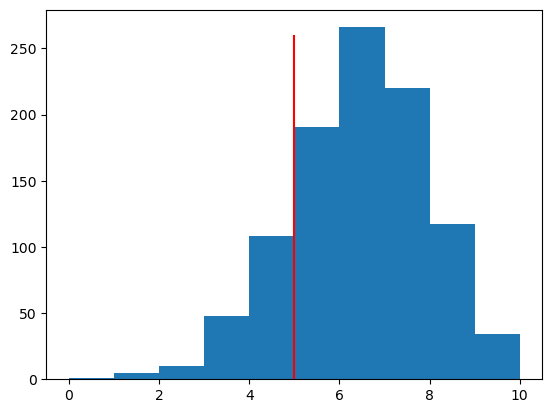

In [114]:
# Binomial Verteilung für diskrete Werte.

# Wurf einer "gezinkten" Münze 10 mal in 1.000 Versuchen.

n, p = 10, 0.6

s = rng.binomial(n, p, 1_000)

# schauen wir uns die Verteilung der erfolgreichen Würfe an
# Matplotlib werden wir später noch genauer kennenlernen

import matplotlib.pyplot as plt

plt.hist(s)
plt.vlines(5, 0, 260, colors='r')
plt.show()

In [101]:
# Ein Profi Baseball Spieler hat ein Chance von 0.275 den Ball mit dem Schläger zu treffen.
# Pro Spiel kommt er durchschnittliche 5 mal zum Schlagen.
# Dieses Spiel hat er gleich vier Bälle von fünf getroffen. 
# Wie hoch ist die Wahrscheinlichtkeit, dass dies passiert?

n, p = 5, 0.275

# wir simulieren 10.000 mal

s = rng.binomial(n, p, 10_000)

print(sum(s == 4) / 10_000)

0.0226


In [102]:
# Bei der Normalverteilung muss man den Mittelwert (loc) und die Standardabweichung (scale) angeben.

norm = rng.normal(loc=168, scale=5, size=42)

norm

array([174.87155807, 162.81816441, 171.09926497, 168.17311347,
       171.08629602, 168.55536863, 166.19716659, 162.23323153,
       172.85597135, 161.41853231, 172.65995614, 165.28449769,
       175.6436763 , 173.0941181 , 172.59959551, 168.43369186,
       171.0294377 , 168.44411905, 168.01804064, 173.45347037,
       168.4099374 , 169.08883092, 176.17555164, 176.21481424,
       159.05729909, 155.62890542, 173.36828311, 174.33515067,
       165.44731172, 175.04987635, 164.62525441, 165.78728651,
       175.57613495, 163.86009728, 166.8934091 , 167.89452141,
       172.918841  , 163.32678441, 162.89886956, 165.96702054,
       166.1509999 , 169.74737631])

## Indexing und Slicing

Indexing funktioniert bei Numpy Arrays genauso mit dem `[]` Operator wie in Python üblich.

In [6]:
my_arr = np.arange(10)

print(my_arr[0])

print(my_arr[-1])

0
9


In [8]:
my_arr.shape = (2, 5)

print(my_arr[0])

print(my_arr[0][-1])

[0 1 2 3 4]
4


Allerdings gibt es in Numpy eine effizientere Methode, um auf die Elemente mehrdimensionaler Arrays zu gehen. Man kann dem `[]` Operator auch ein Tupel an Zahlen übergeben:

```array[0][1] == array[(0, 1)]```

Dies generiert den *view* (was das ist werden wir gleich noch sehen) auf den Array in einem einzigen Schritt und nicht in zweien, wie im Beispiel. Und da sich im Data Science Bereich alles um Effizienz dreht, wollen wir auch so auf Elemente in Numpy Arrays zugreifen.

Nun gibt es aber noch "syntaktischen Zucker" für den Zugriff per Tupel: man kann die runden klammern einfach weg lassen.

```array[(0, 1)] == array[0, 1]```

In [10]:
print(my_arr[(0, -1)])

print(my_arr[0, -1])

4
4


Neben dem Indexing kann man aber auch das *Slicing* auf NumPy Arrays anwenden. Auch hier kann man den Doppelpunkt ":" einsetzen, um *Start* und *Stop* des Intervalls anzugeben.

Bei mehrdimensionalen Arrays kann man diese Schreibweise auch in der abkürzenden Schreibweise wie obern verwenden. Damit bricht NumPy etwas mit der Syntax, wie sie sonst in Python verwendet wird.

In [5]:
arr_2d = np.arange(0, 24).reshape((4, 6))

arr_2d

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [6]:
# die ersten zwei Zeilen:

arr_2d[:2, :]

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [8]:
# die letzten drei Spalten:

arr_2d[:, 3:]

array([[ 3,  4,  5],
       [ 9, 10, 11],
       [15, 16, 17],
       [21, 22, 23]])

In [10]:
# der mittlere Bereiche mit dem Shape (2, 2)

arr_2d[1:3, 2:4]

array([[ 8,  9],
       [14, 15]])

In [12]:
# nur die letzte Spalte

arr_2d[:, -1]

array([ 5, 11, 17, 23])

Allerdings sehen Sie, dass das Array seinen Shape "verliert", wenn Sie nur eine Spalte auswählen. Wir müssen also den Shape erst wieder anpassen, so wie wir es oben gelernt haben.

In [18]:
arr_2d[:, -1].reshape(4, 1)

array([[ 5],
       [11],
       [17],
       [23]])

## Elemente filtern

### Maskierung

NumPy Arrays lassen sich über sog. *Masken* sehr einfach filtern. Eine *Maske* ist dabei eine Array mit gleichen Dimensionen und gleicher Länger, wie der Array, den man maskieren will und enthält ausschließlich `True` und `False` Werte. Gedanklich kann man sich vorstellen, dass diese Maske auf den zu filternden Array gelegt wird und alle Werte, auf denen `False` liegt, "ausgefiltert" werden. Übrig bleiben ergo nur die Elemente, denen `True` zugeordnet wurde.

Bedingungen lassen sich mit der Tilde "~" umkehren.

Über den schon bekannten `[]` Operator wendet man die Maske auf den Array an.

In [42]:
orig_arr = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])

mask = np.array([[True, True, False],
                 [True, True, False],
                 [False, False, False]])

print(orig_arr[mask])

print(orig_arr[~mask])

[1 2 4 5]
[3 6 7 8 9]


Über Vergleichsoperatoren kann man Masken erstellen. Wie akzeptieren hier einfach einmal, dass es funktioniert, so etwas wie `np.array(x) <= 4` zu schreiben. Die Funktionsweise selbst lernen wir aber erst im Kapitel über *Broadcasting* kennen.

In [23]:
mask = orig_arr <= 5

print(mask)

print(orig_arr[mask])

[[ True  True  True]
 [ True  True False]
 [False False False]]
[1 2 3 4 5]


Diese zwei Schritte kann man auch in einem Schritt vereinen.

In [25]:
print(orig_arr[orig_arr >= 7])

print(orig_arr[orig_arr % 2 != 0])

[7 8 9]
[1 3 5 7 9]


### np.where

Mit der Funktion `np.where` filtert man Arrays über eine Bedingung und gibt zwei Effekte an: ein Effekt, der Eintritt, wenn die Bedingung wahr ist, und einer, wenn die Bedingung falsch ist. `np.where` funktioniert damit ähnlich wie eine *if-else* Anweisung. Die Syntax ist:

```
np.where( Bedingung, Effekt wenn wahr, Effekt wenn falsch )
```

In [34]:
x = np.arange(10)

np.where(x % 2 == 0, x, x * 2)

array([ 0,  2,  2,  6,  4, 10,  6, 14,  8, 18])

In [35]:
np.where(x <= 4, 99, -1)

array([99, 99, 99, 99, 99, -1, -1, -1, -1, -1])

### np.isin

Möchte man einen Array danach filtern, je nachdem, ob seine Objekte Elemente einer bestimmten Menge sind, so kann man die Funktion `np.isin` benutzen. Die Syntax ist:

```
np.isin(Array, Prüfmenge)
```

In [41]:
chars = np.array([c for c in "Stefan"])

vowels = np.array(["a", "e", "i", "o", "u"])

chars[~np.isin(chars, vowels)]

array(['S', 't', 'f', 'n'], dtype='<U1')

### np.diagonal und np.tril / np.triu

Möchte man die Werte einer Diagonalen (oder unter/über einer Diagonalen) in einem mehrdimensionalen Arrays finden, so helfen uns die Methoden `diagonal()`, `tril()` und `triu()`; wobei `diagonal()` die Werte der Diagonalen, `tril()` die Werte des unteren Dreiecks (tril = triangle lower) und `triu()` respektive die Werte des oberen Dreiecks (triu = triangle upper) zurückgeben.

`diagonal()` kann ein negativer oder positiver Offset mitgegeben werden, der die Diagonale nach oben oder unten verschiebt, über das Achsenargument verschiebt sich der Offset auch nach links oder rechts. Näheres in der [Dokumentation](https://numpy.org/doc/stable/reference/generated/numpy.diagonal.html).

In [19]:
abcs = list(''.join([char * 5 for char in ['a', 'b', 'c', 'd', 'e']]))
nums = [str(n) for n in list([1, 2, 3, 4, 5] * 5)]
abcnums = [''.join(tup) for tup in zip(abcs, nums)]
my_test_arr = np.array(abcnums).reshape(5, 5)

my_test_arr

array([['a1', 'a2', 'a3', 'a4', 'a5'],
       ['b1', 'b2', 'b3', 'b4', 'b5'],
       ['c1', 'c2', 'c3', 'c4', 'c5'],
       ['d1', 'd2', 'd3', 'd4', 'd5'],
       ['e1', 'e2', 'e3', 'e4', 'e5']], dtype='<U2')

In [35]:
# Rückgabe der diagonalen Werte
np.diagonal(my_test_arr)

array(['a1', 'b2', 'c3', 'd4', 'e5'], dtype='<U2')

In [23]:
# Rückgabe des unteren Dreiecks
np.tril(my_test_arr)

array([['a1', '', '', '', ''],
       ['b1', 'b2', '', '', ''],
       ['c1', 'c2', 'c3', '', ''],
       ['d1', 'd2', 'd3', 'd4', ''],
       ['e1', 'e2', 'e3', 'e4', 'e5']], dtype='<U2')

In [26]:
# Rückgabe um 1 nach unten verschoben (z.B. um bei einer Korrelationsmatrix die Einser nicht mit auszugeben)
np.tril(my_test_arr, k=-1)

array([['', '', '', '', ''],
       ['b1', '', '', '', ''],
       ['c1', 'c2', '', '', ''],
       ['d1', 'd2', 'd3', '', ''],
       ['e1', 'e2', 'e3', 'e4', '']], dtype='<U2')

In [34]:
# noch eine schönere Variante, das ganze auszugeben
for line in np.tril(my_test_arr, k=-1):
    print(' | '.join([c for c in line if len(c) > 0]))


b1
c1 | c2
d1 | d2 | d3
e1 | e2 | e3 | e4


## Achsen

Für die weiteren Funktionen brauchen wir oft den Parameter `axis`, der angibt, auf welche Dimension (= Achse) sich eine Operation auswirken soll. Dabei ist die Achse $0$ immer die "Zeilen"-Achse, Achse $1$ immer die "Spalten"-Achse. Die weiteren Achsen ergeben sich dann aus der jeweiligen Dimension (so ist eben Achse $2$ die "dritte" Dimension).

![Array Achsen](img/array_axis1.png)

## Daten zusammenfügen und entfernen

### np.concatenate

Mit der `NumPy` Methode `.concatenate` lassen sich mehrere Arrays zusammenfügen. Die Funktion nimmt ein Tupel, das die Arrays enthält, zusammen mit einem Argument für die Achse, an der zusammengefügt werden soll, entgegen:
```
np.concatenate((arr1, arr2, ...), axis=0)
```
Aber vorsicht. Die übergebenen Arrays müssen eine gleichlange Dimension haben, an der sie zusammengefügt werden können.

In [22]:
arr1 = np.array([[1, 2], [3, 4]])

arr2 = np.array([5, 6])

np.concatenate((arr1, arr2))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

Warum kommt hier eine Fehlermeldung? Schauen wir uns die Dimensionen der beiden Arrays einmal genauer an.

In [14]:
print(arr1.shape, arr2.shape)

(2, 2) (2,)


Wir sehen, dass `arr2` nur eine einzige Dimension hat, also ein Vektor ist. `arr1` dagegen ist eine Matrix mit 2 Dimensionen. Wir müssen also `arr2` erst in eine zweidimensionale Form mit Hilfe der Funktion `.reshape()` bringen. Dann klappt auch die Concatination.

In [26]:
arr2 = arr2.reshape((1, 2))

print(arr2.shape, '\n')

arr3 = np.concatenate((arr1, arr2))

print(arr3)

(1, 2) 

[[1 2]
 [3 4]
 [5 6]]


Natürlich kann man die Dimensionen auch anders setzen und über den Parameter `axis=` die Achse bennen, an der die zwei Arrays aneinandergefügt werden soll. Dazu müssen wir unseren Array `arr2` aber noch einmal in die richtige Form bringen.

In [28]:
arr2 = arr2.reshape((2, 1))

arr4 = np.concatenate((arr1, arr2), axis=1)

print(arr4)

[[1 2 5]
 [3 4 6]]


In [30]:
arr3 = arr3.reshape(2, 3)

arr5 = np.concatenate((arr2, arr3, arr4), axis=1)

print(arr5)

[[5 1 2 3 1 2 5]
 [6 4 5 6 3 4 6]]


### np.stack

Bei der Funktion `np.concatenate()` konnten Sie nur Arrays anhand schon *vorhandener* Achsen zusammenfügen. `np.stack()` nun bietet die Möglichkeit, Arrays auch an neuen Achsen miteinander zu verbinden, z.B. aus zwei Matrizen einen Tensor zu bilden.

In [19]:
mat_1 = np.arange(21).reshape(3, 7)

mat_2 = np.arange(21, 42).reshape(3, 7)

print(mat_1)
print(mat_2)

[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]]
[[21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]
 [35 36 37 38 39 40 41]]


In [21]:
new_tens = np.stack((mat_1, mat_2), 0)

new_tens

array([[[ 0,  1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12, 13],
        [14, 15, 16, 17, 18, 19, 20]],

       [[21, 22, 23, 24, 25, 26, 27],
        [28, 29, 30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39, 40, 41]]])

In [22]:
new_tens_2 = np.stack((mat_1, mat_2), 1)

new_tens_2

array([[[ 0,  1,  2,  3,  4,  5,  6],
        [21, 22, 23, 24, 25, 26, 27]],

       [[ 7,  8,  9, 10, 11, 12, 13],
        [28, 29, 30, 31, 32, 33, 34]],

       [[14, 15, 16, 17, 18, 19, 20],
        [35, 36, 37, 38, 39, 40, 41]]])

### np.delete

Natürlich kann man auch mit Masken Elemente eines Arrays löschen, indem man bestimmte Werte auf `False` setzt und dann den Array neu zuweist. Eine einfache Möglichkeit bietet aber auch die Funktion `np.delete()`. Die Syntax lautet:

```
np.delete(Array, Zu löschende Objekte, Achse)
```

Dabei können die zu löschenden Objekte ein oder mehrere Elemnte sein. Die Achse gibt an, über welche Dimension gelöscht werden soll.

In [3]:
to_del = np.array([[1, 2, 3, 4, 5],
                   [5, 7, 9, 11, 13],
                   [7, 10, 14, 18, 20]])

In [7]:
# lösche die zweite Zeile entlang der Achse 0

deleted_row = np.delete(to_del, 1, 0)

deleted_row

array([[ 1,  2,  3,  4,  5],
       [ 7, 10, 14, 18, 20]])

In [13]:
# lösche die zwei letzten Spalten (=> Achse 1)

deleted_col = np.delete(to_del, [-1,-2], 1)

deleted_col

array([[ 1,  2,  3],
       [ 5,  7,  9],
       [ 7, 10, 14]])

### np.split

Natürlich lassen sich Arrays auch wieder trennen. Die Syntax ist intuitiv.

In [23]:
to_split = np.array([[1, 2, 3, 4, 5],
                   [5, 7, 9, 11, 13],
                   [7, 10, 14, 18, 20]])

In [34]:
splitted_row = np.split(to_split, 3)

splitted_row

[array([[1, 2, 3, 4, 5]]),
 array([[ 5,  7,  9, 11, 13]]),
 array([[ 7, 10, 14, 18, 20]])]

In [35]:
splitted_col = np.split(to_split, (2, 3), axis=1)

splitted_col

[array([[ 1,  2],
        [ 5,  7],
        [ 7, 10]]),
 array([[ 3],
        [ 9],
        [14]]),
 array([[ 4,  5],
        [11, 13],
        [18, 20]])]

## Numpy Arrays Laden und Speichern

### Dateistreams mit Python öffnen

Für das Lesen von Dateien von der Festplatte steht die Funktion `open()` in Python zur Verfügung. Als Arguemente braucht Sie mindestens einen Pfad zur Datei und den Dateinamen als String, sowie einen bestimmten *Modus* zum Öffnen der Datei ebenfalls als String. Optional können auch noch Informationen zur Codierung der Datei übergeben werden.

`open("Pfad zur Datei + Name", "Modus")`

Folgende Modi stehen zur Verfügung:

| Modus | Bedeutung                                  |
|-------|--------------------------------------------|
| "r"   | Datei wird nur lesend geöffnet.            |
| "w"   | Datei wird nur schreibend geöffnet.        |
| "r+"  | Datei wird lesend und schreibend geöffnet. |
| "rb+" | Datei wird im Binärformat geöffnet.        |

Damit kein Datenverlust erfolgt, muss eine Datei, wenn Sie eingelesen und verarbeitet wurde, **immer** mit der Methode `.close()` geschlossen werden!

In [5]:
file = open("img/numpy_logo.png", "r")

print(type(file))

file.close()

<class '_io.TextIOWrapper'>


Damit möglichst kein Datenverlust geschieht öffnet man Dateien in Python normalerweise in einem sog. *With-Block*. Dieser sorgt dafür, dass selbst bei missglückten Operationen auf den Dateistream, dieser wieder sauber geschlossen wird.

Die Syntax sieht wie folgt aus:
```
with open(...) as <name>:
    mach etwas mit <name>
```

In [7]:
with open("img/numpy_logo.png", "r") as file:
    print(type(file))

<class '_io.TextIOWrapper'>


### np.save und np.load

So können wir nun Numpy Arrays speichern und auch wieder öffnen. Dazu stehen und die Numpy Funktionen `np.save()` und `np.load()` zur Verfügung. Folgende *Dateiformate* stehen uns dabei zur Verfügung:

- `.csv` (Komma separierte Textdatei)
- `.txt` (reine Textdatei)
- `.pkl` (eine Pickle Datei)
- `.npy` (das NumPy eigene Format)

Am effizientesten ist tatsächlich die Speicherung als `.npy` Datei.

In [32]:
new_arr = np.random.random(100).reshape(5, 20)

with open("data/test_save.npy", "wb") as file:
    np.save(file, new_arr)

Genauso können wir mit der Funktion `np.load()` eine `.npy` Datei wieder einlesen.

In [31]:
with open("data/test_save.npy", "rb") as file:
    loaded_arr = np.load(file)
    
loaded_arr[1]

array([0.89129808, 0.19778473, 0.41641027, 0.67294669, 0.58948442,
       0.8583714 , 0.59618886, 0.80257135, 0.88723119, 0.29273734,
       0.44690206, 0.72438551, 0.92043573, 0.88708781, 0.80793182,
       0.30377051, 0.705016  , 0.82430651, 0.32786455, 0.67468352])

Aber natürlich lässt sich das Ganze auch als Text Datei speichern.

In [33]:
np.savetxt("data/test_save.txt", new_arr)

### np.genfromtext

Wir werden zwar mit *Pandas* noch viel mächtigere und auch einfachere Werkzeuge zum Einlesen von Dateien kennenlernen, haben wir es aber mit Typen homogenen Daten in Form einer `txt` Datei zu tun, so kann man diese auch schnell mit NumPy einlesen und Verarbeiten.

In [29]:
batting_hits_2021 = np.genfromtxt("data/batting_hits_2021.txt")

batting_hits_2021

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       ...,
       [62., 16.,  0., 14.],
       [ 0.,  0.,  0.,  0.],
       [72., 11.,  2., 33.]])

Fehlen in der Textdatei aber einige Werte oder sind diese fehlenden Werte durch Zeichenstrings markiert, so kommt es beim Einlesen zu Fehlern. Mit den Parametern `missing_values` und `filling_values` kann man einerseits angeben, welche Strings als "missing" interpretiert werden sollen und mit welchen Strings/Zahlen diese fehlenden Werte evtl. ersetzt werden sollen. Weiter Möglichkeiten findet man in der [Dokumentation](https://numpy.org/devdocs/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt).

In [30]:
batting_hits_2021_wm = np.genfromtxt("data/batting_hits_2021_with_missing.txt",
                                 missing_values=("-"), # Achtung! hier muss ein 'Set' angegeben werden!
                                 filling_values=0)

batting_hits_2021_wm

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       ...,
       [62., 16.,  0., 14.],
       [ 0.,  0.,  0.,  0.],
       [72., 11.,  2., 33.]])

## Numpy Datentypen dtypes

Das Typsystem von Numpy ist umfangreicher und angepasster als das Typsystem von Python.

### Typ Coersion

# Mathematische und Statistische Funktionen mit NumPy

## Mathematische Operationen

Im Prinzip können wir leicht die einfachsten mathematischen Operationen auf Array anwenden. Die Rechenoperation wird dann elementweise angewendet.

In [38]:
arr_1 = np.array([2, 4, 6, 8])

arr_2 = np.array([3, 5, 7, 9])

In [39]:
arr_1 + arr_2

array([ 5,  9, 13, 17])

In [40]:
arr_1 - arr_2

array([-1, -1, -1, -1])

In [41]:
arr_1 * arr_2

array([ 6, 20, 42, 72])

In [42]:
arr_1 / arr_2

array([0.66666667, 0.8       , 0.85714286, 0.88888889])

### Broadcasting

"Broadcasting" nennt man die Erweiterung eines Arrays um so viele Dimensionen, damit eine Rechenoperation auf Arrays angewendet werden kann, selbst wenn die Dimensionen nicht zusammenpassen. Was das genau bedeutet sollen ein paar Beispiele deutlich machen.

Um allerdings erfolgreich einen Array auf einen anderen zu broadcasten, muss *eine von zwei Bedingungen* für **alle** Dimensionen der Arrays gelten:
- die Länge einer der zu vergleichende Dimensionen ist 1,
- oder beide zu vergleichenden Dimensionen sind gleich lang.

Um das besser zu verstehen, schauen wir uns ein Beispiel an:
```
Array 1: [[0, 0, 0, 0],   Array 2: [[0],
          [0, 0, 0, 0],             [0],
          [0, 0, 0, 0],             [0],
          [0, 0, 0, 0],             [0],
          [0, 0, 0, 0]]             [0]]
          
np.shape() von Array 1: (5, 4)
                        /    \
              gleich lang    eine Dim gleich 1
                        \    /
np.shape() von Array 2: (5, 1)
```
Ein Broadcasting von Array 1 und Array 2 funktioniert also, weil für jede der Dimensionen eine Bedingung erfüllt ist.

![Broadcasting von Matrizen](img/broadcasting_2.png)

In [3]:
# Achtung!

arr = np.arange(10).reshape(2, 5)
arr2 = np.array([0, 1])

arr + arr2

ValueError: operands could not be broadcast together with shapes (2,5) (2,) 

In [4]:
# die shapes passen nicht zusammen!

print(arr.shape, arr2.shape)

(2, 5) (2,)


In [8]:
# erst durch einen Reshape von arr2 geht es!

arr2 = arr2.reshape((2, 1))

print(arr + arr2)

[[ 0  1  2  3  4]
 [ 6  7  8  9 10]]


![Broadcasting nach Reshape](img/broadcasting_3.png)

### "echte" Matrizen-Multiplikation

Um in der Mathematik wichtige Eigenschaften der Multiplikation zu bewahren, wie Assoziativität, Kommutativität oder das Vorhandensein eines inversen und eines neutralen Elements, sieht etwas anders aus, wie oben mit dem `*` Operator gezeigt.

Das Matrizenprodukt ist wieder eine Matrix, deren Einträge durch komponentenweise Multiplikation und Summation der Einträge der entsprechenden Zeile der ersten Matrix mit der entsprechenden Spalte der zweiten Matrix ermittelt werden. Um zwei Matrizen miteinander multiplizieren zu können, muss die Spaltenzahl der ersten Matrix mit der Zeilenzahl der zweiten Matrix übereinstimmen.

Folgendes Schaubild verdeutlicht dies:

![Matrizen Multiplikation](img/matrix_mult.png)

Natürlich gibt es in NumPy wie für viele andere Funktionen aus der *linearen Algebra* die Möglichkeit einer "echten" Matrizen Multiplikation:

```
np.matmul(Array1, Array2)
```

In [9]:
matrix_1 = rng.choice(list(range(10)), size=6).reshape((2, 3))
print(matrix_1, "\n")

print("   X  \n")

matrix_2 = rng.choice(list(range(10, 21)), size=6).reshape((3, 2))
print(matrix_2, "\n")

print("   =  \n")

mult = np.matmul(matrix_1, matrix_2)
print(mult)

[[7 6 4]
 [7 2 7]] 

   X  

[[16 15]
 [15 16]
 [10 11]] 

   =  

[[242 245]
 [212 214]]


## Aggregatsfunktionen

### np.sum

Als Beispiel haben wir die Verkaufszahlen von 12 Monaten (Zeilen) von drei Industriezweigen.

In [21]:
monthly_sales_industries = np.array([[ 4134, 23925,  8657],
                                     [ 4116, 23875,  9142],
                                     [ 4673, 27197, 10645],
                                     [ 4580, 25637, 10456],
                                     [ 5109, 27995, 11299],
                                     [ 5011, 27419, 10625],
                                     [ 5245, 27305, 10630],
                                     [ 5270, 27760, 11550],
                                     [ 4680, 24988,  9762],
                                     [ 5312, 25405, 13401],
                                     [ 6630, 27797, 18403],
                                     [ 7893, 28990, 18765]])

Wenden wir auf diesen Array die Aggregatsfunktion `.sum()` an, so werden sämtliche Verkaufszahlen des Jahres summiert und als Wert zurückgegeben.

In [40]:
monthly_sales_industries.sum()

468633

Möchte man allerdings die Summen der einzelnen Industriezweige eines Jahres summieren, so muss man die Achse angeben, über die summiert werden soll. In diesem Fall müssten wir die Zeilen-Achse, also `axis=0` verwenden.

In [42]:
monthly_sales_industries.sum(axis=0)

array([ 54760, 289303, 124570])

Möchte man hingegen die Werte der einzelnen Monate aufsummieren, so muss man dementsprechend an der anderen Achse, also `axis=1` summieren.

In [44]:
monthly_sales_industries.sum(axis=1)

array([36716, 37133, 42515, 40673, 44403, 43055, 43180, 44580, 39430,
       44118, 52830])

Schade ist, dass sich hier nun aber die Shape des Arrays verändert hat. Da wir ja die einzelnen Spalten summiert haben, sollte die Ausgabe auch in Spaltenform erfolgen, um so vielleicht dieses "Summenspalte" mit dem Array für Verkaufszahlen zu konkatenieren.

Hierfür gibt es das Argument `keepdims`, dem man die boolschen Werte `True` und `False` übergeben kann.

In [45]:
monthly_sums = monthly_sales_industries.sum(axis=1, keepdims=True)

monthly_sums

array([[36716],
       [37133],
       [42515],
       [40673],
       [44403],
       [43055],
       [43180],
       [44580],
       [39430],
       [44118],
       [52830]])

In [48]:
np.concatenate((monthly_sales_industries, monthly_sums), axis=1)

array([[ 4134, 23925,  8657, 36716],
       [ 4116, 23875,  9142, 37133],
       [ 4673, 27197, 10645, 42515],
       [ 4580, 25637, 10456, 40673],
       [ 5109, 27995, 11299, 44403],
       [ 5011, 27419, 10625, 43055],
       [ 5245, 27305, 10630, 43180],
       [ 5270, 27760, 11550, 44580],
       [ 4680, 24988,  9762, 39430],
       [ 5312, 25405, 13401, 44118],
       [ 6630, 27797, 18403, 52830]])

## Maße der zentralen Tendenz

Ebenso wie die Summe, können Sie sich auch den Mittelwert und den Median berechnen lassen

### np.mean

In [22]:
np.mean(monthly_sales_industries, axis=0)

array([ 5221.08333333, 26524.41666667, 11944.58333333])

### np.median

In [23]:
np.median(monthly_sales_industries, axis=0)

array([ 5060. , 27251. , 10637.5])

## Maße der Streuung 

### np.std

In [24]:
np.std(monthly_sales_industries, axis=0)

array([1024.66364061, 1618.31607226, 3184.90485097])

### Quantile / Percentile: np.quantile

Mit `np.quantile` lassen sich die Quantile einer Stichprobe berechnen. Bei `np.quantile`, muss man als Argumente ein Array, sowie die Liste der Quantile zwischen 0 und 1, die man berechnen will, übergeben.

In [14]:
# wir berechnen die Quartile 25%, 50% und 75%

koerpergroessen = np.random.normal(1.75, .15, 100) # 100 zufällig normalverteilte Körpergröẞen

np.quantile(koerpergroessen, [.25, .5, .75])

array([1.67376875, 1.74300249, 1.82081906])

Wollen wir mehr Quantile, ist es mühselig, diese als Liste auszuschreiben. Der Einfachheit halber können wir die Funktion `np.linspace` benutzen, die wir schon kennengelernt haben und die eine kontinuierliche Zahlenreihe in gleichgroẞe Stücke "zerschneidet". So können wir die Zahlenreihe von 0 bis 1 benutzen, um diese in Quantile zu zerschneiden und an `np.quantile` zu übergeben.

Hier ein paar Beispiele:

In [13]:
# Quintile (5 Quantile):

print("Quintile:", np.quantile(koerpergroessen, np.linspace(0, 1, 5)))

# Decile (10 Quantile):

print("Centile:", np.quantile(koerpergroessen, np.linspace(0, 1, 10)))

Quintile: [1.4515198  1.66539975 1.76501605 1.88188364 2.08062421]
Centile: [1.4515198  1.59257309 1.66420276 1.68446388 1.74643079 1.78222782
 1.8361634  1.88969072 1.98373368 2.08062421]


## np.max, np.min

Diese zwei Funktionen geben das Maximum und das Minimum in einem Arrays an.

In [39]:
arr = rng.random(100)

np.max(arr)

0.992375564055837

In [40]:
np.min(arr)

0.013936287708201545

## np.unique

Eine letzte wichtige Funktion, die man häufig braucht, ist, sich die einzigartigen Elemente eines Arrays anzeigen zu lassen. Dafür gibt es die Funktion `np.unique`. Man könnte natürlich die Elemente auch in ein "Python Set" überführen, `np.uique` besitzt aber noch die Annehmlichkeit, sich die Anzahl der einzigartigen Elemente ausgeben zu lassen.

In [17]:
ids = np.array(["id7893", "id3893", "id7893", "id3829", "id0977", "id3829",
                "id7389", "id3893", "id3103", "id8392", "id7893", "id0977"])

unique_ids = np.unique(ids)

unique_ids

array(['id0977', 'id3103', 'id3829', 'id3893', 'id7389', 'id7893',
       'id8392'], dtype='<U6')

In [19]:
# zählen kann man mit dem Argument return_counts=True

unique_ids_counts = np.unique(ids, return_counts=True)

unique_ids_counts

(array(['id0977', 'id3103', 'id3829', 'id3893', 'id7389', 'id7893',
        'id8392'], dtype='<U6'),
 array([2, 1, 2, 2, 1, 3, 1]))

In [20]:
# zur schöneren Darstellung kann man diese beiden zurückgegebenen Elemente
# zippen und in ein Python Dictionary überführen

unique_ids, counts = np.unique(ids, return_counts=True)
zipped = zip(unique_ids, counts)
print(dict(zipped))

{'id0977': 2, 'id3103': 1, 'id3829': 2, 'id3893': 2, 'id7389': 1, 'id7893': 3, 'id8392': 1}


# Praxisbeispiel: Baseball

Baseball gilt als *der* Sport mit den meisten Statistiken schlechthin. Es hat sich eine ganze Disziplin, die sog. [Sabermetrics](https://de.wikipedia.org/wiki/Sabermetrics) darum gebildet. Die größte Liga der USA, die [MLB](https://de.wikipedia.org/wiki/Major_League_Baseball) hat Milliarden an Dollar in das sog. [StatCast System](https://en.wikipedia.org/wiki/Statcast) investiert, das 2015 alle 30 MLB Stadien mit modernster Messtechnik und Highspeed Kameras ausgestattet, so dass jeder Pitch, jedes Batting, jedes Fielding physikalisch so genau wie möglich gemessen wird.

Wir wollen uns aber hier einmal einen eher bescheideneren Datensatz ansehen, der alle Spieler der Saison 2021 auslistet und in 6 Spalten angibt, wie viele Spiele sie gespielt haben, wie viele At-Bats sie hatte (also wie oft sie zum Schlagen angetreten sind), wie oft sie den Ball ins Spiel brachten, wie oft sie dabei direkt aufs zweite, aufs dritte Mal (Base) kamen und wie viele Homeruns sie hatten.

Basehit: [https://www.youtube.com/watch?v=o-usjbW1--U](https://www.youtube.com/watch?v=o-usjbW1--U)

Double (2B): [https://www.youtube.com/watch?v=um4amJb9aeY](https://www.youtube.com/watch?v=um4amJb9aeY)

Triples (3b): [https://www.youtube.com/watch?v=S4Im4MSVNcc](https://www.youtube.com/watch?v=S4Im4MSVNcc)

Homeruns: [https://www.youtube.com/watch?v=CiDy3-EsXiM](https://www.youtube.com/watch?v=CiDy3-EsXiM)

In [55]:
import matplotlib.pyplot as plt

batting = np.genfromtxt("data/batting_hits_2021.txt", dtype="int32")

In [56]:
batting.shape

(1706, 6)

In [57]:
# Games, AtBats, Basehit, 2nd, 3rd, HR

# Wie viele Hits gab es im Jahr 2021 insgesamt?
# Wir summieren also über die Spalten mit Index 2 bis Ende

np.sum(batting[:, 2:])

53962

In [58]:
# dies ist der äquivalente Aufruf der Methode .sum()

batting[:, 2:].sum() # jemand mit einem "funktionalen" Mindset würde aber obigen Stil präferieren

53962

In [59]:
# Wie viele Hits hatte ein Spieler in der Saison 2021 durchschnittlich?

np.mean(batting[:, 2:])

7.90767878077374

In [60]:
# Das scheinen sehr wenige Hits für eine ganze Saison zu sein.
# Was sagt uns die Standardabweichung?

np.std(batting[:, 2:])

23.314267645684566

In [61]:
# Besser ist wohl, wir sehen uns erst einmal den stabileren Median an

np.median(batting[:, 2:])

0.0

In [62]:
# Ohje! Ein deutliches Zeichen, dass wir die Personen aussortieren sollten, die gar keine Hits geschlagen haben.

batting_cleaned = batting[np.apply_along_axis(lambda x: np.any(x), 1, batting[:, 2:])]

print(batting_cleaned[:10, :]) # Anzeige der ersten 10 Einträge

print(batting_cleaned.shape)

[[  8   3   1   0   0   0]
 [152 566 148  30   2  30]
 [ 82 297  84  19   1  24]
 [ 41 132  26   6   1   5]
 [ 99 365 104  26   0  20]
 [ 22  36   6   1   0   0]
 [ 12  28   3   2   0   0]
 [ 35  71  19   6   1   2]
 [ 35 130  32   5   2   4]
 [109 182  45   9   2   5]]
(857, 6)


In [63]:
# Das sieht schon besser aus!
# Schauen wir uns also noch einmal sum, mean, median und standard deviation an
print(np.mean(batting_cleaned[:, 2:]))

print(np.median(batting_cleaned[:, 2:]))

print(np.std(batting_cleaned[:, 2:]))

15.741540256709452
3.0
30.963189104826743


(857,)


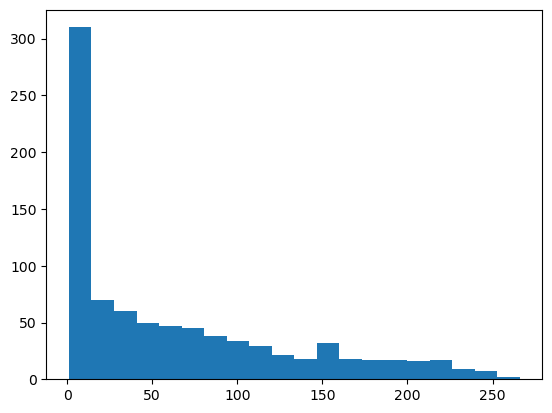

In [64]:
# schauen wir uns doch mal in einem Histogramm an, wie sich die Summen verteilen

sum_hits = np.apply_along_axis(lambda x: np.sum(x), 1, batting_cleaned[:, 2:])

print(sum_hits.shape)

plt.hist(sum_hits, bins=20)
plt.show()

In [65]:
# wie sieht es noch aus, wenn wir die Spieler herausnehmen, die weniger als 6 Hits hatten

hits, counts = np.unique(sum_hits, return_counts=True)

print(dict(zip(hits, counts)))

{1: 81, 2: 48, 3: 31, 4: 28, 5: 23, 6: 17, 7: 15, 8: 14, 9: 13, 10: 9, 11: 7, 12: 8, 13: 14, 14: 2, 15: 9, 16: 7, 17: 3, 18: 10, 19: 7, 20: 5, 21: 6, 22: 5, 23: 2, 24: 6, 25: 3, 26: 4, 27: 3, 28: 5, 29: 7, 30: 4, 31: 4, 32: 7, 33: 2, 34: 1, 35: 6, 36: 7, 37: 1, 38: 4, 39: 6, 40: 6, 41: 6, 42: 4, 43: 8, 44: 2, 45: 2, 46: 3, 47: 2, 48: 5, 49: 2, 50: 6, 51: 3, 52: 4, 53: 3, 54: 1, 55: 6, 56: 6, 57: 3, 58: 3, 59: 7, 61: 7, 62: 1, 63: 2, 64: 3, 65: 4, 66: 2, 67: 2, 68: 7, 69: 3, 70: 2, 71: 4, 73: 6, 74: 5, 75: 4, 76: 2, 77: 5, 78: 3, 79: 1, 80: 3, 81: 4, 82: 3, 83: 3, 84: 5, 85: 3, 86: 3, 87: 4, 88: 2, 89: 2, 90: 3, 91: 2, 92: 3, 93: 1, 94: 4, 95: 3, 96: 4, 97: 3, 98: 2, 99: 2, 100: 3, 101: 5, 102: 1, 103: 3, 104: 2, 105: 1, 106: 1, 107: 2, 108: 1, 109: 1, 110: 2, 111: 3, 112: 2, 113: 2, 114: 2, 115: 1, 116: 4, 117: 1, 118: 1, 119: 3, 120: 4, 121: 5, 123: 4, 124: 2, 125: 2, 126: 1, 128: 2, 129: 2, 130: 1, 131: 1, 132: 1, 134: 3, 135: 2, 136: 1, 137: 1, 138: 1, 139: 1, 140: 2, 141: 1, 142: 3

(578,)


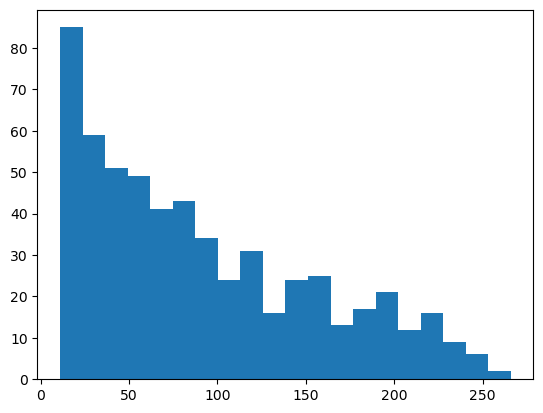

In [66]:
# wie sieht es noch aus, wenn wir die Spieler herausnehmen, die weniger als 11 Hits hatten

sum_hits_over_10 = sum_hits[np.apply_along_axis(lambda x: x > 10, 0, sum_hits)]

print(sum_hits_over_10.shape)

plt.hist(sum_hits_over_10, bins=20)
plt.show()

In [67]:
# aber vielleicht resultieren die wenigen Hits pro Saison auch einfach an der Tatsache, dass viele Spieler,
# die gelistet wurden, gar nicht die ganze Saison spielten.
# In welcher Korrelation steht eigentlich die Anzahl Spiele, bzw. Anzahl At-Bats im Verhältnis
# zu den geschlagenen Hits?

# wir holen uns die Spalten Games und At-Bats...
games_atbats = batting_cleaned[:, :2]

# ... richten den Shape von sum_hits ...
sum_hits.shape = (857, 1)

# ... und fügen beide an der 1. Achse zusammen.
g_ab_hits = np.concatenate((games_atbats, sum_hits), axis=1)

g_ab_hits

array([[  8,   3,   1],
       [152, 566, 210],
       [ 82, 297, 128],
       ...,
       [ 99, 299,  86],
       [110, 255,  92],
       [109, 333, 118]])

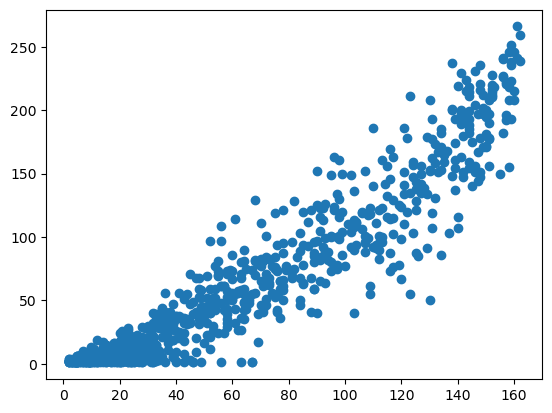

In [68]:
# Wie ist die Korrelation zwischen Games und Hits?

plt.scatter(g_ab_hits[:, 0], g_ab_hits[:, 2])
plt.show()

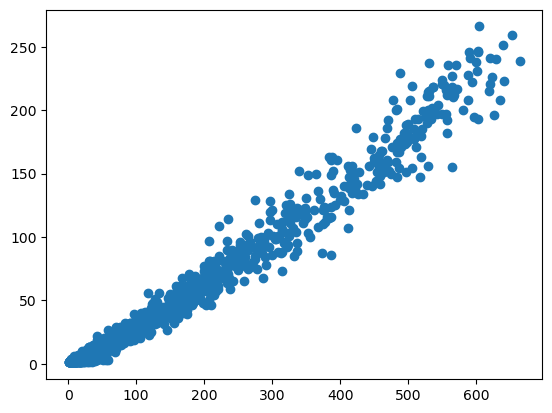

In [69]:
# Das sieht schon mal sehr eindeutig aus!
# Und wie ist dann die Korrelation zwischen At-Bats und Hits?

plt.scatter(g_ab_hits[:, 1], g_ab_hits[:, 2])
plt.show()

In [70]:
# Was ist eigentlich mean und median von Game und At-Bats pro Spieler?

print(f"Mean Games: {np.mean(g_ab_hits[:, 0])}")
print(f"Median Games: {np.median(g_ab_hits[:, 0])}\n")

print(f"Mean At-Bats: {np.mean(g_ab_hits[:, 1])}")
print(f"Median At-Bats: {np.median(g_ab_hits[:, 1])}")

Mean Games: 62.4924154025671
Median Games: 49.0

Mean At-Bats: 187.7561260210035
Median At-Bats: 127.0


In [71]:
# "Echte" Ausnahmespieler scheinen also zu den oberen 50% der Spieler in der MLB zu gehören.
# Wir brauchen also einen weiteren statistischen Wert, der besser als die reinen Anzahl an Hits ausdrückt,
# wie gut ein Spieler den Ball trifft. Dieser Wert ist traditionellerweise der sog. Batting Average oder
# einfach AVG. Also die Anzahl an Hits geteilt durch die Anzahl an At-Bats.
# Fügen wir diesen Wert als neue Spalte hinzu:

avg = np.apply_along_axis(lambda x: x[2] / x[1], 1, g_ab_hits)

avg.shape = (avg.shape[0], 1)

g_ab_hits_avg = np.concatenate((g_ab_hits, avg), axis=1, dtype="float32")

print(g_ab_hits_avg)

[[8.0000000e+00 3.0000000e+00 1.0000000e+00 3.3333334e-01]
 [1.5200000e+02 5.6600000e+02 2.1000000e+02 3.7102473e-01]
 [8.2000000e+01 2.9700000e+02 1.2800000e+02 4.3097642e-01]
 ...
 [9.9000000e+01 2.9900000e+02 8.6000000e+01 2.8762543e-01]
 [1.1000000e+02 2.5500000e+02 9.2000000e+01 3.6078432e-01]
 [1.0900000e+02 3.3300000e+02 1.1800000e+02 3.5435435e-01]]


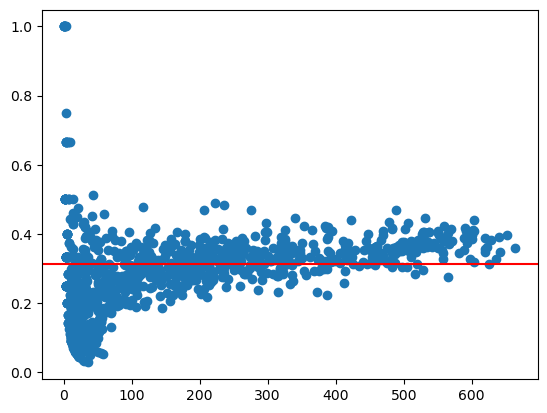

In [72]:
# wie sieht nun die Korrelation zwischen At-Bats und AVG aus?

plt.scatter(g_ab_hits_avg[:, 1], g_ab_hits_avg[:, 3])
plt.axhline(np.median(g_ab_hits_avg[:, 3]), color='r')
plt.show()

In [73]:
# Was ist der durchschnittliche AVG bei Spielern, die mehr als hundert At-Bats haben?

over_100_abs = g_ab_hits_avg[g_ab_hits_avg[:, 1] > 100]

np.mean(over_100_abs[:, 3])

0.3330699

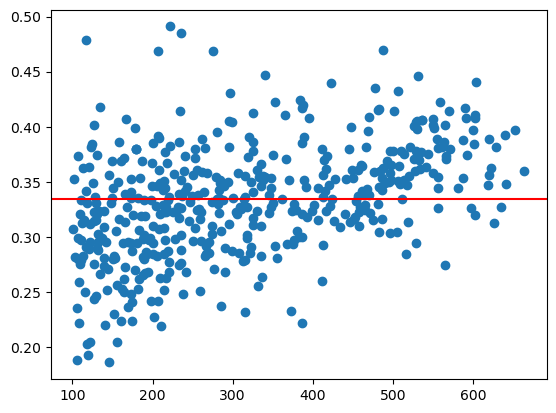

In [74]:
# das wollen wir nun noch plotten

plt.scatter(over_100_abs[:, 1], over_100_abs[:, 3])
plt.axhline(np.median(over_100_abs[:, 3]), color='r')
plt.show()